In [47]:
import os
import librosa
import noisereduce as nr
from IPython.display import Audio
import matplotlib.pyplot as plt
import pandas as pd
import natsort
from scipy.io.wavfile import write

In [48]:
sample_rate = 44100

In [49]:
file_path= 'data/ICBHI_2017/'
file_list = os.listdir(file_path)

In [50]:
file_list

['107_2b3_Ar_mc_AKGC417L.txt', '107_2b3_Ar_mc_AKGC417L.wav']

In [51]:
for file in file_list:
    if file[-3:] == 'wav':
        print(file)
        t, sr = librosa.load(file_path + file, sr=sample_rate)
    elif file[-3:] == 'txt':
        print(file)
        events = pd.read_csv(file_path + file, sep='\t', header=None)

107_2b3_Ar_mc_AKGC417L.txt
107_2b3_Ar_mc_AKGC417L.wav


In [52]:
raw_data = t
nr_data = nr.reduce_noise(y = raw_data, sr=sample_rate, n_std_thresh_stationary=0.1, stationary=True)

# Save audio file (range of s is [-1, 1]).
write('nr_data_test.wav', sample_rate, nr_data)

In [53]:
print(events[2].values)
if 2 in events[2].values:
    print(True)

[0 1 1 1 1 1 1 1]


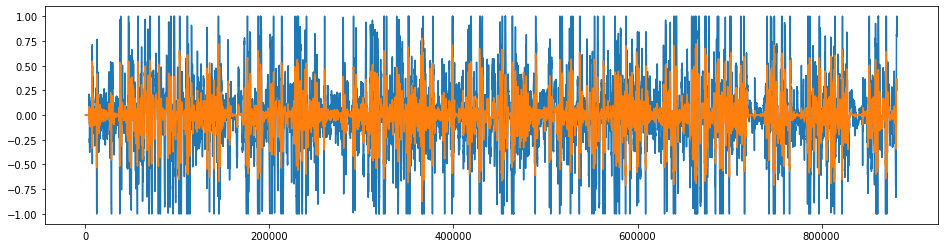

In [54]:
plt.figure(figsize=(16,4))
plt.plot(t)
plt.plot(nr_data)

In [55]:
Audio(t, rate = sample_rate)

In [56]:
Audio(nr_data, rate = sample_rate)

In [57]:
# # 압축파일 풀기
# !unzip data/ICBHI_final_database.zip -d data/ICBHI_database

In [76]:
# # 압축파일 풀기
# !unzip data/ICBHI_events_for_jupyter.zip -d data/ICBHI_events

In [78]:
# # 압축파일 풀기
# !unzip data/larger_dataset_with_ICBHI.zip -d data/train_with_ICBHI

In [58]:
path = 'data/ICBHI/'
subject = pd.read_csv('data/ICBHI_info/ICBHI_Challenge_diagnosis.txt', sep='\t', header=None)

In [59]:
subject

0          1
0    101       URTI
1    102    Healthy
2    103     Asthma
3    104       COPD
4    105       URTI
..   ...        ...
121  222       COPD
122  223       COPD
123  224    Healthy
124  225    Healthy
125  226  Pneumonia

[126 rows x 2 columns]

In [60]:
# subject 별 index 찾기

Asthma_numbers = []
COPD_numbers = []
Healthy_numbers = []

for index, name in enumerate(subject[1]):
    if name == 'Asthma':
        Asthma_numbers.append(subject[0][index])
    elif name == 'COPD':
        COPD_numbers.append(subject[0][index])
    elif name == 'Healthy':
        Healthy_numbers.append(subject[0][index])

print(len(Asthma_numbers))
print(len(COPD_numbers))
print(len(Healthy_numbers))
print(len(Asthma_numbers) + len(COPD_numbers) + len(Healthy_numbers))

1
64
26
91


In [61]:
print(type(Asthma_numbers[0]), Asthma_numbers[0])

<class 'numpy.int64'> 103


In [62]:
print(COPD_numbers[:2])

[104, 106]


In [63]:
test_list = [100, 120]
if int('100') in test_list:
    print('True')

True


In [64]:
file_path= 'data/ICBHI_database/'
file_list = os.listdir(file_path)
file_list = natsort.natsorted(file_list)

In [65]:
file_list[0][:3]

'101'

In [66]:
file_list[0][:-4]

'101_1b1_Al_sc_Meditron'

In [74]:
# data extraction of Asthma, COPD, Healthy patient
save_path = 'data/ICBHI_extracted/'
count = 0

for file in file_list:
    if int(file[:3]) in Asthma_numbers:
        if file[-3:] == 'txt':
#             print('Asthma:')
            events = pd.read_csv(file_path + file, sep='\t', header=None)
            if 1 in events[2].values:
                continue
        else:
            continue
        
    elif int(file[:3]) in COPD_numbers:
        if file[-3:] == 'txt':
#             print('COPD:')
            events = pd.read_csv(file_path + file, sep='\t', header=None)
            if 1 in events[2].values:
                continue
        else:
            continue        
            
    elif int(file[:3]) in Healthy_numbers:
        if file[-3:] == 'txt': 
#             print('Healthy:')
            events = pd.read_csv(file_path + file, sep='\t', header=None)   
            if 1 in events[2].values:
                continue
        else:
            continue
            
    else:
        continue
    
#     print(file)
    sample_rate = librosa.get_samplerate(file_path + file[:-4] + '.wav')
    if sample_rate < 10000:
        continue
#     print(sample_rate)
    count += 1
    t, sr = librosa.load(file_path + file[:-4] + '.wav', sr=sample_rate)
    nr_data = nr.reduce_noise(y = t, sr=sample_rate, n_std_thresh_stationary=0.1, stationary=True)
    write(save_path + file[:-4] + '.wav', sample_rate, nr_data)        

print(count)


358


In [ ]:
file_path = 'data/ICBHI_events/'
file_list = os.listdir(file_path)
events = pd.read_csv('data/ICBHI_info/ICBHI_Challenge_diagnosis.txt', sep='\t', header=None)